In [2]:
from IPython.display import Image

In [3]:
Image(url="images/ada.jpg", width=500, height=300)

# AdaBoost

Random Forest and AdaBoost are two popular machine learning algorithms. 

Both algorithms can be used for <span style="color:red">classification</span> and <span style="color:red">regression</span> tasks.

Both Random Forest and AdaBoost algorithm is based on the creation of a Forest of trees. Random Forest is an ensemble learning algorithm that is created using a bunch of decision trees that make use of different variables or features and makes use of bagging techniques for data samples.

AdaBoost is also an ensemble learning algorithm that is created using a bunch of what is called a decision stump. Decision stumps are nothing but decision trees with one node and two leaves.

In [5]:
Image(url="images/trees.png", width=700, height=400)

The AdaBoost algorithm can be said to make decisions using a bunch of decision stumps.

**The tree is then tweaked iteratively to focus on areas where it predicts incorrectly.**

As a result, AdaBoost typically provides more accurate predictions than Random Forest. However, AdaBoost is also more sensitive to over-fitting than Random Forest. Here are different posts on Random forest and AdaBoost.

In [4]:
Image(url="images/vote.png", width=700, height=400)

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [46]:
import pandas as pd

In [47]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

#### Our AdaBoost Classifier

In [48]:
clf_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ada.fit(X, y)

clf_ada.score(X, y)

0.983

#### Our Random Forest Classifier

In [49]:
clf_randi = RandomForestClassifier(max_depth=2, random_state=0)
clf_randi.fit(X, y)

clf_randi.score(X, y)

0.946

In [ ]:
###############################################################################################

In [76]:
Image(url="images/xgboost.png", width=500, height=300)

In [79]:
Image(url="images/evolution.png", width=700, height=500)

In [78]:
Image(url="images/comparison.jpg", width=700, height=500)

# XGBoost

In [50]:
import pandas as pd
import seaborn as sns

In [51]:
df = pd.read_csv("data.csv")

In [52]:
# Label is the column that we want to predict

df = df.rename(columns={'diagnosis':'Label'})

In [53]:
df

,id,Label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


<AxesSubplot:xlabel='Label', ylabel='count'>

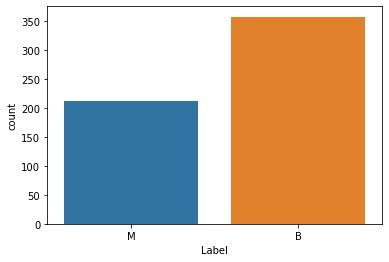

In [54]:
# Understand the data 
sns.countplot(x="Label", data=df) # M - malignant   B - benign

In [55]:
####### Replace categorical values with numbers########
df['Label'].value_counts()

B    357
M    212
Name: Label, dtype: int64

In [56]:
# Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values

In [57]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0

In [58]:
X = df.drop(labels = ["Label", "id"], axis=1) 

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

/Users/kasra/Anaconda3/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/kasra/Anaconda3/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [60]:
# Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [61]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
y_pred = model.predict(X_test)

In [63]:
# Evaluate the classifier on test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy = ", (accuracy * 100.0), "%")

Accuracy =  96.5034965034965 %


<AxesSubplot:>

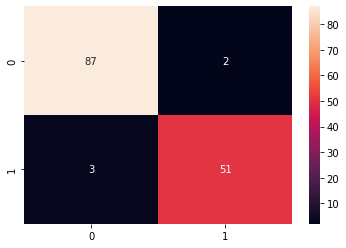

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)